In [2]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


Saved under data.csv


In [1]:
from sklearn.feature_extraction import DictVectorizer

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
# from sklearn.feature_extraction.dict_vectorizer import DictVectorizer
# from sklearn_contrib.feature_extraction.dict_vectorizer import DictVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
data=pd.read_csv('data.csv')
data.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
from sklearn.feature_extraction import DictVectorizer

In [6]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
#  Take the subset of data with the following columns ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp']:
cols=['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
data=data[cols]

In [8]:
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [9]:
# columns in data:
data.columns


Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [10]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [11]:
# print the columns in data:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [12]:
# Fill in the missing values of the selected features with 0:
data=data.fillna(0)
# Rename MSRP variable to price.
data=data.rename(columns={'msrp':'price'})


In [13]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [14]:
# calculate mode
data['transmission_type'].mode()


0    AUTOMATIC
Name: transmission_type, dtype: object

In [15]:
# extract the numeric features:
data_numeric=data.select_dtypes(include=[np.number])
data_numeric.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500


In [16]:
# corelaation matrix
data_numeric.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


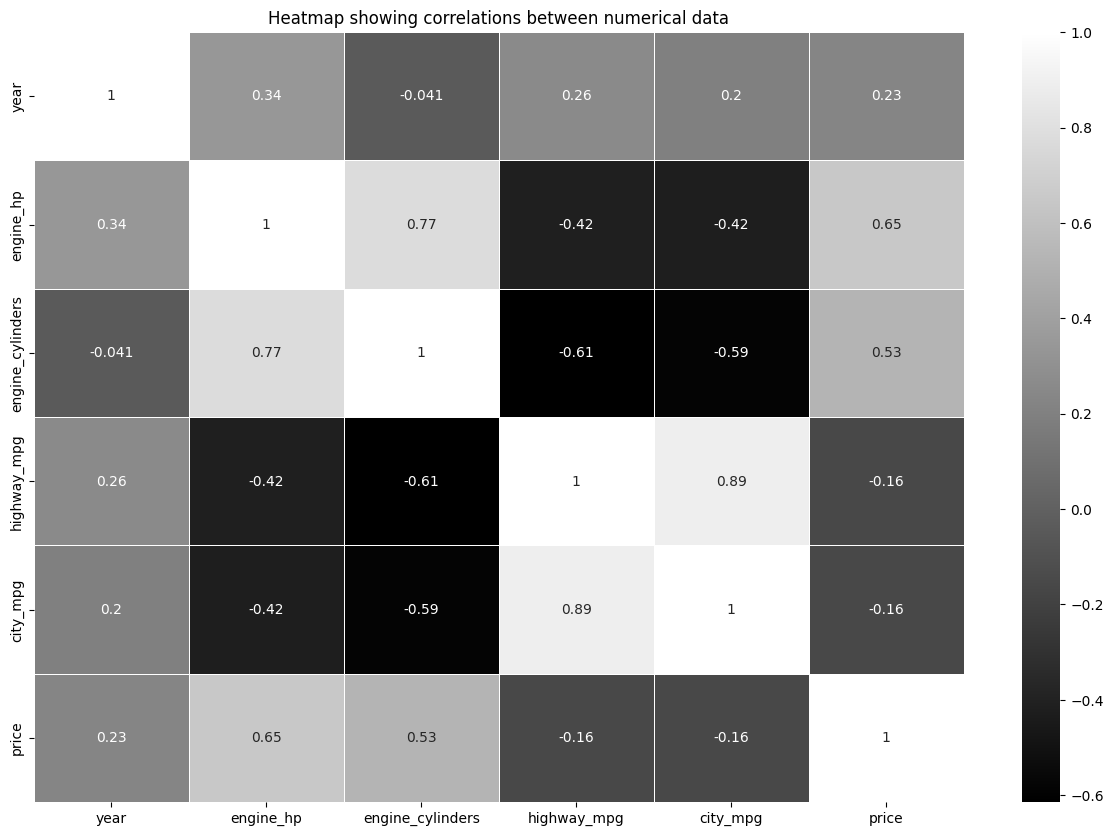

In [17]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="gray")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [18]:
data_numeric.corr().unstack().sort_values(ascending = False)[:15]

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
dtype: float64

In [19]:
#@ PROCESSING DATASET:
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [20]:
data_class = data_class.drop('price', axis=1)


In [21]:
data_class.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [22]:
# Split your data in train/val/test sets with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=42)
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Make sure that the target value (above_average) is not in your dataframe.

In [23]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
1930,Volkswagen,Beetle,2016,210.0,4.0,MANUAL,2dr Hatchback,31,23,0
2202,Chevrolet,Camaro,2017,650.0,8.0,MANUAL,Convertible,20,14,1
9245,Toyota,Sienna,2017,296.0,6.0,AUTOMATIC,Passenger Minivan,27,19,0
4079,Hyundai,Equus,2014,429.0,8.0,AUTOMATIC,Sedan,23,15,1
3521,Aston Martin,DB7,2003,420.0,12.0,MANUAL,Convertible,17,10,1


In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Volkswagen,Beetle,2016,210.0,4.0,MANUAL,2dr Hatchback,31,23,0
1,Chevrolet,Camaro,2017,650.0,8.0,MANUAL,Convertible,20,14,1
2,Toyota,Sienna,2017,296.0,6.0,AUTOMATIC,Passenger Minivan,27,19,0
3,Hyundai,Equus,2014,429.0,8.0,AUTOMATIC,Sedan,23,15,1
4,Aston Martin,DB7,2003,420.0,12.0,MANUAL,Convertible,17,10,1


In [26]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [27]:
# drop the target variable from the dataset:
# del df_train['']
# del df_val['above_average']


In [28]:
# categorical variables in the dataset:
# year	engine_hp	engine_cylinders	highway_mpg	city_mpg	price
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']


In [29]:



#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ IMPLEMENTATION:
df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,0.460514
make,0.240114
vehicle_style,0.084334
transmission_type,0.021262


In [30]:
# Round the scores to 2 decimals using round(score, 2).
df_mi = df_mi.round(2)

In [31]:
df_mi

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


In [32]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [33]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Volkswagen,Beetle,2016,210.0,4.0,MANUAL,2dr Hatchback,31,23
1,Chevrolet,Camaro,2017,650.0,8.0,MANUAL,Convertible,20,14
2,Toyota,Sienna,2017,296.0,6.0,AUTOMATIC,Passenger Minivan,27,19
3,Hyundai,Equus,2014,429.0,8.0,AUTOMATIC,Sedan,23,15
4,Aston Martin,DB7,2003,420.0,12.0,MANUAL,Convertible,17,10


In [34]:
numerical=['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
train_dict = df_train[categorical + numerical].to_dict(orient='records')

#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [36]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#@ INITIALIZING THE MODEL PREDICTION:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

#@ INSPECTING THE ACCURACY:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.94


In [37]:
features = categorical + numerical
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [38]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

make 0.02966963817514412 0.9103303618248558
model 0.02495018353434708 0.9150498164656529
transmission_type -0.004415312008390182 0.9444153120083901
vehicle_style 0.011316203460933316 0.9286837965390666
year -0.004939695857367643 0.9449396958573676
engine_hp 0.020755112742527504 0.9192448872574724
engine_cylinders -0.0002202412165706047 0.9402202412165706
highway_mpg -0.0017933927635029878 0.9417933927635029
city_mpg 0.00030414263240685635 0.9396958573675931


In [39]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [41]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.3008


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.3008


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.3008


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.3009
10 0.301


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
